# Linear Regression
Let us consider $n$ pairs $(x_i, y_i) \in \mathbb{R}^d \times \mathbb{R}$. Our goal is to find a good linear model corresponding to this dataset. A linear model is a predictor of the form $g_\theta (x) = \theta^\top x$, where $\theta \in \mathbb{R}^d$; it produces a value in $\mathbb{R}$ and we quantify the prediction error using the square error: $\ell(g_\theta (x), y) = (\theta^\top x - y)^2$.

Our problem can thus be summarized as follows:
$$
  \min_{\theta \in \mathbb{R}^d} \frac{1}{2n} \sum_{i = 1}^n  (\theta^\top x_i - y_i )^2 
$$

Let us first generate a dataset.

In [9]:
%pip install pandas matplotlib seaborn scipy
import numpy as np
import matplotlib.pyplot as plt

d = 10
n = 1_000

true_parameter = np.ones(d) # 生成一个 demension 为 d 的 array [1, 1, 1, ...]

X = np.random.randn(n, d) # 生成一个 matirx X，每一行代表一个数据点(1000 row),每个数据点有 d 个 features
y = X @ true_parameter + .2 * np.random.randn(n) # 矩阵乘法，x 是 n*d true_para 是 d*1

Note: you may need to restart the kernel to use updated packages.


Here, we generated a batch of features $(x_1, \ldots, x_n)$ from a Gaussian distribution. Then, we paired each $x_i$ to a value $y_i = x_i^\top \theta^\star + \varepsilon_i$, where $\theta^\star$ is the _true_ linear parameter and $\varepsilon_i$ is some independent Gaussian noise.

### Question 1.
Create a function `objective(theta, X, y)` that returns the average loss of the parameter $\theta$ for the dataset `X, y` (i.e., the objective of the above minimization problem).

In [10]:
def objective(theta, X, y):
    prediction = X @ theta # g(x)
    residuals = prediction - y # g(xi) - yi (残差)
    avg_loss = (1/2)* np.mean(residuals**2) # 1/2 * avg([g(xi)-yi]^2)
    return avg_loss

### Question 2.
**2.a.** Find the gradient $\nabla f(\theta)$ of $f(\theta) = \frac{1}{2n} \sum_{i=1}^n (\theta^\top x_i - y_i)^2$.

**2.b.** Implement it in the function `gradient(theta, X, y)` below.

In [11]:
def gradient(theta, X, y): # gredient = 1/n * X.T(X*theta - y)
    n = len(y) # 因为有 n 个数据点
    residuals = X @ theta - y
    grad = (1/n) * (X.T @ residuals)
    return grad


## Gradient Descent
A popular optimization method to find a good estimate of the parameter $\theta^\star$ is the gradient descent. The overall idea is to start from some initial guess $\theta_0$, compute the gradient of the loss $\nabla \mathcal{L}$ at $w_0$ and update the parameter in the opposite direction
$$
\theta_1 = \theta_0 - \gamma \nabla\mathcal{L}(\theta_0) \enspace,
$$
where $\gamma > 0$ is an hyperparameter called step size. Then, the updating process is repeated for a set amount of iterations.


### Question 3.
The gradient descent procedure is partially defined in the function `gradient_descent(theta0, X, y, step_size=1e-2, n_iter=100)` below. Complete it and test your `gradient` implementation with it.

In [12]:
def gradient_descent(theta0, step_size=1e-2, n_iter=1000): # step size 就是 lamda
    theta = theta0.copy()
    loss_evolution = []
    for _ in range(n_iter): # 进行1000 次 iteration (在 loop 结束后 loss_evolution 中有1000个根据不同 theta 计算的 avg_loss)
        grad = gradient(theta, X, y) # 求出当前 theta 的 gradient
        theta = theta - step_size*grad # 更新 theta, 由于先进行右面运算，所以行实现计算更新即可

        # update loss_evolution (直接把新的 loss append 到空 lst 中即可)
        avg_loss = objective(theta, X, y)
        loss_evolution.append(avg_loss)

    return theta, loss_evolution

The following script runs the gradient descent procedure and plot the decision boundary.

Relative distance from the true parameter: 0.64%


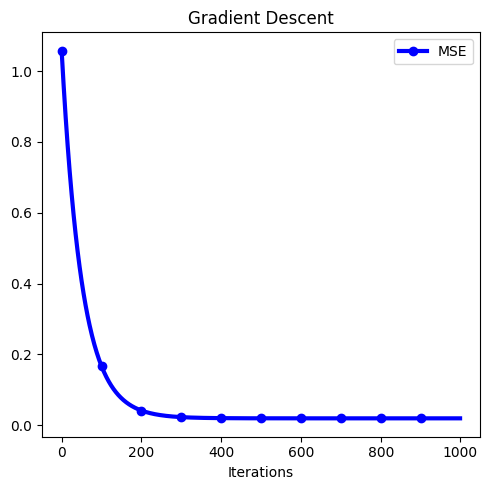

In [ ]:
theta0 = np.random.rand(d)
est_theta, loss_values = gradient_descent(theta0)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), layout='tight')

# Loss
ax.plot(loss_values, linewidth=3, color='b', marker='o',
            markevery=100, label='MSE')
ax.set_xlabel('Iterations')
ax.legend()
ax.set_title('Gradient Descent');

print(f"Relative distance from the true parameter: {np.linalg.norm(est_theta - true_parameter) / np.linalg.norm(true_parameter):.2%}")

# 结果说名，gradient descent 算法成功收敛，随iteration avg loss 快速下降到逐渐平稳收敛至 0，图像代表了 mean square error 随 iteration 的变化